In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
pd.options.display.max_rows = 9999
from IPython.display import display
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md
import pandas as pd
from datetime import datetime

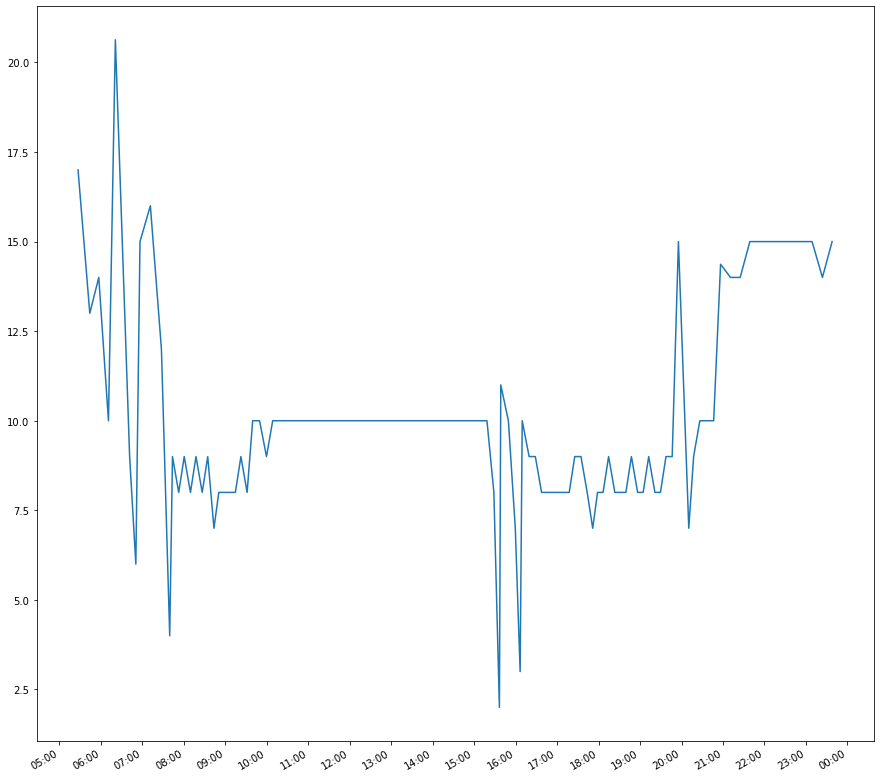

In [61]:
stop_times = pd.read_csv("Data/stop_times.csv")
stop_times.head()
stop_id = '5271F'
trip_id = '236487051'
stop_times = stop_times.loc[stop_times['stop_id'] == stop_id	].sort_values(by='arrival_time',ascending = True)
stop_times = stop_times[stop_times['trip_id'].astype(str).str.contains(trip_id)]
# stop_times
intervals_array = []

for i in range(len(stop_times['arrival_time'].values)):
    try:
        intervals_array.append((datetime.strptime(stop_times['arrival_time'].values[i+1], "%H:%M:%S")-datetime.strptime(stop_times['arrival_time'].values[i], "%H:%M:%S")).total_seconds()/60)
    except IndexError:
        intervals_array.append(0)
    except ValueError:
        ##这里讨论24小时以上问题
        intervals_array.append(0)  
# print(intervals_array)

# stop_times.assign(intervals=intervals_array)
stop_times['intervals']=intervals_array

stop_times

#delete rows to test:
stop_times = stop_times.drop(1989548)
stop_times = stop_times.drop(1989579)
stop_times = stop_times.drop(1989642)
stop_times = stop_times.drop(1989737)
stop_times = stop_times.drop(1989768)
stop_times = stop_times.drop(1987917)

stop_times


stop_times['arrival_time'] = pd.to_datetime(stop_times['arrival_time'],format='%H:%M:%S')


fig, ax = plt.subplots(figsize=(15,15))
                                                               
plt.plot('arrival_time', 'intervals', data=stop_times)                                         
                                                               
ax.set_xlim(stop_times['arrival_time'].min()-pd.Timedelta(1,'h'),
            stop_times['arrival_time'].max()+pd.Timedelta(1,'h'))

ax.xaxis.set_major_locator(md.HourLocator(interval = 1))
ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))

fig.autofmt_xdate()

plt.show()